# Logistic Regression

참고 : 파이썬 라이브러리를 활용한 머신러닝

> 이진 분류에 사용한다. <br>
> 선형 모델을 이용한 것이다.

### parameter
* C : 규제의 강도
> 기본값 1 <br>
> L2 규제 사용 <br>
> 값이 높아지면 규제 감소 (낮아지면 계수가 0에 가까워지도록 한다.)

##### 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### 데이터 불러오기

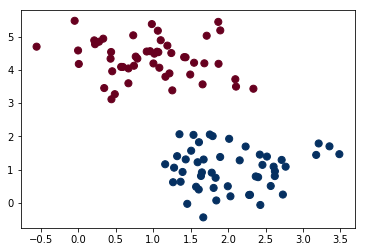

In [3]:
X, y = make_blobs(100, 2, centers=2, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', s=50)

##### 데이터 나누기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

##### 모델 훈련

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### 모델 평가

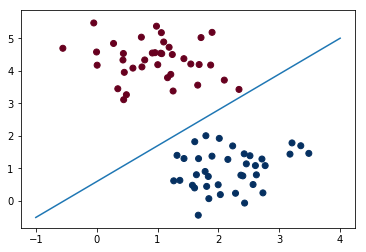

In [6]:
x = np.linspace(-1,4,100)
plt.plot(x, (-logreg.coef_[0,0] * x - logreg.intercept_)/logreg.coef_[0,1],'-')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdBu')

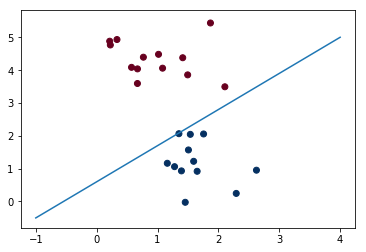

In [7]:
x = np.linspace(-1,4,100)
plt.plot(x, (-logreg.coef_[0,0] * x - logreg.intercept_)/logreg.coef_[0,1],'-')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdBu')

In [8]:
print('train score : {}'.format(logreg.score(X_train,y_train)))
print('test score : {}'.format(logreg.score(X_test,y_test)))

train score : 1.0
test score : 1.0


##### 목표 변수 예측

In [9]:
pred = logreg.predict(X_test)
pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1])

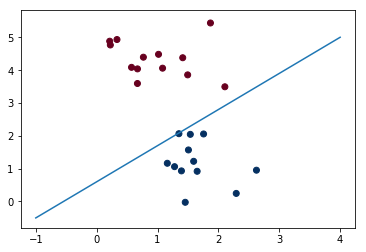

In [10]:
x = np.linspace(-1,4,100)
plt.plot(x, (-logreg.coef_[0,0] * x - logreg.intercept_)/logreg.coef_[0,1],'-')
plt.scatter(X_test[:,0], X_test[:,1], c=pred, cmap='RdBu')

## 활용

In [11]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

for c in [0.01,0.1,1,10,100]:
    print('When C={}'.format(c))
    
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train,y_train)
    
    print('train score : {:.2f}'.format(logreg.score(X_train,y_train)))
    print('test score : {:.2f}'.format(logreg.score(X_test,y_test)))

When C=0.01
train score : 0.94
test score : 0.92
When C=0.1
train score : 0.95
test score : 0.93
When C=1
train score : 0.96
test score : 0.94
When C=10
train score : 0.97
test score : 0.94
When C=100
train score : 0.98
test score : 0.94


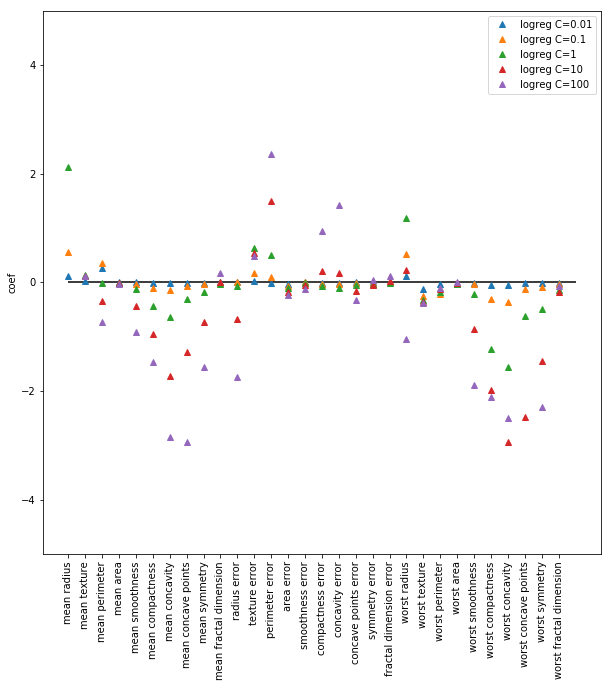

In [12]:
def coef_graph(X_train, y_train, c):
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)    
    plt.plot(logreg.coef_.T, "^", label="logreg C="+str(c))

plt.figure(figsize=(10,10))

coef_graph(X_train, y_train, 0.01)
coef_graph(X_train, y_train, 0.1)
coef_graph(X_train, y_train, 1)
coef_graph(X_train, y_train, 10)
coef_graph(X_train, y_train, 100)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylabel("coef")
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.legend()
plt.show()